# Cryptocurrency for Energy Conscious Investors

Use this as a template for presenting findings. (Protfolio analysis using PoW, PoS and Hybrid Consensus Protocols)

## Executive Summary

In the cryptocurrency market, there are two known leaders who are dominating– Bitcoin and Ethereum. According to TradingView, as of today Bitcoin has about 45% of the cryptocurrency market with a market value of 570.252 billion USD, while Ethereum coins are worth approximately 243.536 billion USD or 19.7%. Together, these coins make up over 64% of the total cryptocurrency market. Both consume as much energy as an entire mid-size country. These facts led us to hypothesis that there are other eco-friendlier cryptocurrencies or “EcoCryptos” that energy conscious investors should consider adopting into their portfolios?

We believe that there is an emerging group of eco-conscious investors out there, who value both profit and the environment, and would utilize tools to determine eco-friendliness of cryptocurrencies in the present market for investment picks.


## Proposal

The goal of our project is to investigate and compare eco-friendly blockchain technologies to traditional/non-eco-friendly blockchain technologies. To distinguish eco-friendly blockchain/crypto protocols from non-eco-friendly ones, we will need to define them. The first thing that comes to mind is the topic of blockchain energy consumption and evaluating their energy efficiency, which is the use of less energy to perform the same task or produce the same result.

As the topic of energy consumption with blockchain technologies has recently gained media attention, particularly in relation to Bitcoin's energy consumption, energy efficient and sustainable technology has sparked discussion and debate about blockchain's ability to be a sustainable ecosystem. We are looking holistically at all types of blockchains: Proof-of-Work, Proof-of-Stake, hybrids.

Given that the technologies underlying cryptocurrency are powered by electricity, industries are starting to decarbonize their operations in order to facilitate widespread, sustainable industry growth. Future research in decarbonization initiatives and the Crypto Climate Accord were launched as a private sector-led initiative for the entire crypto community focused on decarbonizing the cryptocurrency industry in record time.


## Recomendations  (should this be moved to the bottom? I'm not sure.)

When deciding on the underlying technology for developing their necessary digital infrastructure, businesses, local, state, and national governments should consider the energy consumption and efficiency of blockchain. Scalability and performance in terms of energy efficiency are closely related. In the future, there should be a focus on maximizing the use of renewable energy to meet the energy demand of blockchain-based solutions. The energy efficiency (energy consumption) of blockchain solutions is closely related to the underlying mechanism used to achieve network consensus. Other types of consensus mechanisms and verification protocols should be developed to avoid excessive energy consumption as cryptocurrency becomes more popular and heavily invested in.

---
References:
###### (1) https://www.tradingview.com/symbols/CRYPTOCAP-BTC.D/ as of 5/22/22
###### (2) https://www.tradingview.com/symbols/CRYPTOCAP-ETH/ as of 5/22/22
###### (3) https://www.fool.com/investing/stock-market/market-sectors/financials/cryptocurrency-stocks/eco-friendly-cryptocurrency/ retrieved 5/22/22 written on 5/12/22

## Data Collection, Cleanup & Exploration

Import necessary libraries and initialize out portfolio dataframes and curated efficiency data.

In [1]:
# Load required libraries and functions
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from utils.crypto_data_downloader import *
from utils.env_efficiency import *
from utils.env_crypto_tvl import *
from utils.plot_formatters import *
# from utils.analysis import *
from utils.coinbase import *
from utils.MCForecastTools import MCSimulation
from dotenv import load_dotenv
# from bokeh.models.formatters import DatetimeTickFormatter, NumeralTickFormatter
load_dotenv()
!nvidia-smi

Sun May 22 22:40:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.68.01    Driver Version: 512.59       CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:01:00.0  On |                  Off |
|  0%   51C    P8    22W / 450W |   2057MiB / 24564MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Define PoW and PoS Portfolios

Populate our portfolio and give ourselves some funds to diversify.

In [2]:
# Define lists to work from later
pow_coins = ["BTC-USD","ETH-USD"]
pos_coins = ["ADA-BTC","SOL-BTC","ALGO-BTC","XTZ-BTC"]
coins = pow_coins + pos_coins

# Create a diversified portfolio organized by type of cryptocurrency
data = {"Stake": ["PoW", "PoW", "PoS", "PoS", "PoS", "PoS"], "Coin": coins, "Pct": [0.1, 0.3, 0.1, 0.1, 0.1, 0.3]}
portfolio = pd.DataFrame(data=data)

# Give ourselves a little imaginary coin
starting_funds = 7625.47
portfolio["Funds"] = portfolio["Pct"]*starting_funds
print("\nPortfolio Composition DataFrame\n")
# display(portfolio)
# portfolio.hvplot.bar(y="Stake", x="Coins" )
portfolio.hvplot.bar(x="Coin", y="Funds",
                     
                     title="Portfolio",
                     hover_cols=["Stake","Pct", "Funds"],
                     width=900,
                     height=400
                    )


Portfolio Composition DataFrame



:Bars   [Coin]   (Funds,Stake,Pct)

### Portfolio Composition

We've exploded the Proof of Stake cryptocurrencies.

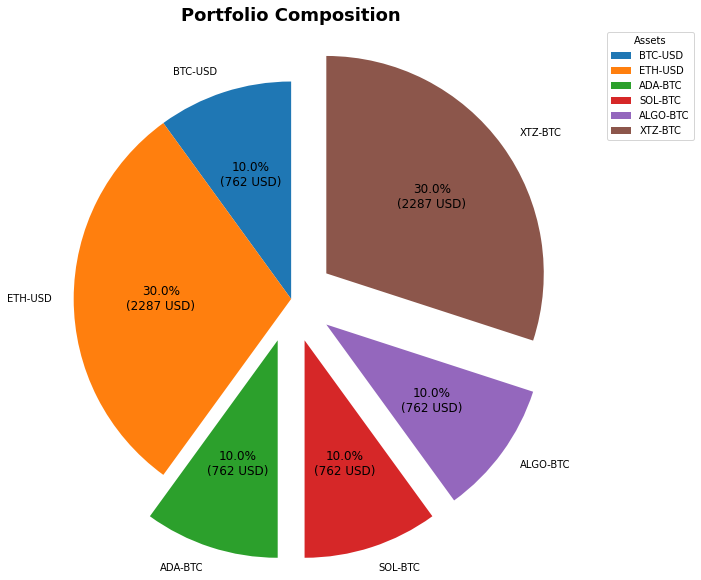

In [3]:
make_pie(portfolio)

### Which consensus mechanism is better?

For investment purposes, does the PoW or PoS model benefit investors? And how specifically?

If you want to know what each blockchain consumes and its ratio depending on the TVL (Total Value Lock), these are the results:

In [4]:
# Import csv data and display pandas dataframe.
display(download_link(fetch_env_crypto_tvl_data().fillna("no-data")))
fetch_env_crypto_tvl_data().fillna("no-data")

Coin Name           Kilowatts  \
0           Bitcoin  89,780,000,000 kWh   
1          Ethereum  17,300,000,000 kWh   
2  Avalanche (AVAX)         489,311 kWh   
3            Solana       1,967,930 kWh   
4           Cardano         598,755 kWh   
5          Polkadot          70,237 kWh   
6             Tezos          94,120 kWh   
7          Algorand         512,671 kWh   
8           Bitcoin  89,780,000,000 kWh   

                                TVL per kWh  \
0  $10,224,775,841 annual electricity costs   
1                                   no-data   
2                           $18,454 per kWh   
3                            $4,395 per kWh   
4                              $120 per kWh   
5                            $19.18 per kWh   
6                              $943 per kWh   
7                              $161 per kWh   
8                                   no-data   

  Verification method for transactions     Speed of transactions?  \
0                                  PoW    4.6 transactions/second   
1                              no-data                    no-data   
2                                  PoS    4500 transaction/second   
3                                  PoS  65,000 transaction/second   
4                                  PoS    250 transactions/second   
5                                  PoS                    no-data   
6                                  PoS                    no-data   
7                                  PoS                    no-data   
8                              no-data                    no-data   

             Size of Network Release Date  
0                     324 GB       2009.0  
1                    no-data      no-data  
2                       2 GB       2015.0  
3  200 GB with various nodes       2020.0  
4                      88 KB       2017.0  
5                    no-data      no-data  
6                    no-data      no-data  
7                    no-data      no-data  
8                    no-data      no-data

### Top 20 Mineable Cryptocurrencies by Market Capitalization on 03/27/2020

*Data was curated by [Science Direct](https://www.sciencedirect.com/science/article/pii/S2542435120303317)

In [5]:
display(download_link(fetch_env_efficiency_data().fillna("no-data")))
fetch_env_efficiency_data()

Name Symbol    Algorithm  MarketCapMill  MarketCapPct  \
10  Bitcoin Gold    BTG       ZHasha        133.000          0.09   
18        Komodo    KMD     Equihash         46.000          0.03   
19      Bytecoin    BCN  CryptoNight         43.000          0.03   
14         Bytom    BTM    Tensority         61.000          0.04   
17       Horizen    ZEN     Equihash         48.000          0.03   
5         Monero    XMR     RandomXa        864.000          0.56   
8          Zcash    ZEC     Equihash        310.000          0.20   
7     Ethereum C    ETC      Ethasha        597.000          0.39   
12     RavenCoin    RVN      X16Rv2a         89.000          0.06   
13      MonaCoin   MONA    Lyra2REv2         85.000          0.05   
9       DogeCoin   DOGE       Scrypt        229.000          0.15   
4       Litecoin    LTC       Scrypt          2.595          1.68   
1       Ethereum    ETH      Ethasha         15.209          9.87   
6           Dash   DASH          X11        639.000          0.41   
15       SiaCoin     SC          Sia         55.000          0.04   
16      DigiByte    DGB      SHA-256         53.000          0.03   
11        Decred    DCR        Blake        125.000          0.08   
3     Bitcoin SV    BSV      SHA-256          3.181          2.07   
2   Bitcoin Cash    BCH      SHA-256          4.183          2.72   
0        Bitcoin    BTC      SHA-256        122.768         79.69   

          Hashes    Efficiency  RatedPowerKW  RatedPowerPct  
10  2.640000e+06  0.000000e+00         8.949           0.14  
18  6.080000e+07  9.000000e+01       674.000           0.01  
19  2.330000e+08  5.000000e+02       467.000           0.01  
14  5.300000e+08  1.820000e+02         2.915           0.05  
17  6.860000e+08  9.000000e+01         7.606           0.12  
5   1.270000e+09  6.000000e+00       210.277           3.35  
8   4.420000e+09  9.000000e+01        49.022           0.78  
7   9.870000e+12  2.280000e+05        43.278           0.69  
12  3.140000e+13  1.160000e+05       270.792           4.32  
13  9.160000e+13  1.170000e+07         7.844           0.13  
9   1.300000e+14  8.270000e+05       157.494           2.51  
4   1.360000e+14  8.270000e+05       164.796           2.63  
1   1.640000e+14  2.280000e+05       719.087          11.46  
6   4.590000e+15  1.230000e+08        37.386           0.60  
15  5.700000e+15  1.220000e+09         4.664           0.07  
16  6.600000e+16  2.530000e+10         2.608           0.04  
11  4.160000e+17  1.890000e+10        22.013           0.35  
3   3.040000e+18  2.530000e+10       120.077           1.91  
2   3.880000e+18  2.530000e+10       153.374           2.44  
0   1.090000e+20  2.530000e+10      4291.366          68.39

In [6]:
display(bar_chart(fetch_env_efficiency_data()[:7]))

:Bars   [Symbol]   (RatedPowerKW,Efficiency,Algorithm)

#### Comparison of several coins using the above mechanism

We can construct an even weighted portfolio of these coins in our next steps.

In [7]:
efficiency_scatter(fetch_env_efficiency_data()[:7])

:NdOverlay   [Algorithm]
   :Scatter   [Hashes]   (Efficiency,_size,RatedPowerPct,Algorithm)

#### Consolidate data for the energy consumption
* Get list of eco-friendly coins
    * PoW – 
        * Bitcoin (BTC-USD)
        * Ethereum (ETH-USD)
    * PoS – 
        * Solana (SOL-BTC)
        * Cardana (ADA-BTC)
        * ~~Avalanche~~ Algorand (ALGO-BTC)
        * ~~Iota~~ Tezos (XTZ-BTC)
        * ~~Nano~~ *unavailable on coinbase exchange

Next, we get historical data for our portfolio of PoS Cryptocurrencies and compare with PoW Bitcoin/Ethereum:
* Volatility
* ROI

### Fetch and Compile Historical Data

Call functions `fetch_return_history()` and `merge_candle_data()` on our PoW and PoS lists to fetch results, save them locally, and populate DataFrames() for analysis.

Data must be retrieved in chunks of 300. The sequence is (+/-300 days) [0,300,600,900,1200,etc...]

We do 1200 on these coins but there is not more history than that with the PoS coins.

In [8]:
# # Fetch Return history in days: (multiples of 300... or not)
num_days_to_fetch = 1200
start = "2022-05-20"
days = list(range(0, num_days_to_fetch, 300))

# for crypt in pow_coins:
#     fetch_return_history(crypt,start,days)

# for crypt in pos_coins:
#     fetch_return_history(crypt,start,days)

# for crypt in pow_coins:
#     merge_candle_data(crypt)

# for crypt in pos_coins:
#     merge_candle_data(crypt)

### Data Preperation

Read the data files into pandas and initialize the dataframes. (`pct_change` has been calculated in the called function.)

In [9]:
# Using the glob functionality to grab the filenames of our merged data into a pandas dictionary
# This method initializes a unique dataframe on each read through the loop
extension = 'csv'
files = glob.glob('data/product/candles/merged/*.{}'.format(extension))
file_dict = {}
for file in files:
    key = file
    df = pd.read_csv(file)
    file_dict[key] = df

# Now rename our dataframes to prevent headaches:
btc_df = file_dict["data/product/candles/merged/coinbase_BTC-USD_candles_ALL.csv"].drop(columns=["Unnamed: 0","unix"]).set_index("time")
eth_df = file_dict["data/product/candles/merged/coinbase_ETH-USD_candles_ALL.csv"].drop(columns=["Unnamed: 0","unix"]).set_index("time")
ada_df = file_dict["data/product/candles/merged/coinbase_ADA-BTC_candles_ALL.csv"].drop(columns=["Unnamed: 0","unix"]).set_index("time")
sol_df = file_dict["data/product/candles/merged/coinbase_SOL-BTC_candles_ALL.csv"].drop(columns=["Unnamed: 0","unix"]).set_index("time")
algo_df = file_dict["data/product/candles/merged/coinbase_ALGO-BTC_candles_ALL.csv"].drop(columns=["Unnamed: 0","unix"]).set_index("time")
xtz_df = file_dict["data/product/candles/merged/coinbase_XTZ-BTC_candles_ALL.csv"].drop(columns=["Unnamed: 0","unix"]).set_index("time")

# Adding pct change to all df
btc_df["pct_change"] = btc_df["close"].pct_change().fillna(0) 
eth_df["pct_change"] = eth_df["close"].pct_change().fillna(0) 
ada_df["pct_change"] = ada_df["close"].pct_change().fillna(0) 
sol_df["pct_change"] = sol_df["close"].pct_change().fillna(0) 
algo_df["pct_change"] = algo_df["close"].pct_change().fillna(0)
xtz_df["pct_change"] = xtz_df["close"].pct_change().fillna(0)

print("\n\nBitcoin")
display(btc_df.head(1)) 
display(btc_df.tail(1))
print("\n\nEthereum")
display(eth_df.head(1)) 
display(eth_df.tail(1)) 
print("\n\nCardano")
display(ada_df.head(1)) 
display(ada_df.tail(1)) 
print("\n\nSolana")
display(sol_df.head(1)) 
display(sol_df.tail(1)) 
print("\n\nAlgorand")
display(algo_df.head(1))
display(algo_df.tail(1))
print("\n\nTezos")
display(xtz_df.head(1)) 
display(xtz_df.tail(1))



Bitcoin


close        date      high       low      open      vol_fiat  \
time                                                                           
2022-05-20  29155.75  2022-05-20  30729.83  28690.92  30274.59  1.000864e+09   

                  volume  pct_change  
time                                  
2022-05-20  34328.187919         0.0

close        date     high      low     open      vol_fiat  \
time                                                                      
2019-02-07  3359.0  2019-02-07  3383.14  3352.01  3366.01  2.893375e+07   

                 volume  pct_change  
time                                 
2019-02-07  8613.799127   -0.072609



Ethereum


close        date     high      low     open      vol_fiat  \
time                                                                       
2022-05-20  1956.58  2022-05-20  2062.45  1919.56  2017.36  3.868322e+08   

                   volume  pct_change  
time                                   
2022-05-20  197708.340534         0.0

close        date    high     low    open      vol_fiat  \
time                                                                   
2019-02-07  103.21  2019-02-07  104.77  102.75  103.32  4.945404e+06   

                  volume  pct_change  
time                                  
2019-02-07  47915.938889   -0.125042



Cardano


close        date      high       low      open   vol_fiat  \
time                                                                        
2022-05-20  0.000018  2022-05-20  0.000018  0.000017  0.000018  19.418312   

                volume  pct_change  
time                                
2022-05-20  1098320.81         0.0

close        date      high       low      open    vol_fiat  \
time                                                                         
2021-03-18  0.000021  2021-03-18  0.000032  0.000021  0.000027  416.856379   

                 volume  pct_change  
time                                 
2021-03-18  19534038.39   -0.053659



Solana


close        date      high      low      open   vol_fiat  \
time                                                                       
2022-05-20  0.001695  2022-05-20  0.001763  0.00166  0.001721  79.355557   

               volume  pct_change  
time                               
2022-05-20  46817.438         0.0

close        date      high       low      open   vol_fiat  \
time                                                                        
2021-06-17  0.001033  2021-06-17  0.001045  0.001017  0.001031  14.532578   

               volume  pct_change  
time                               
2021-06-17  14061.517    0.001939



Algorand


close        date      high       low      open   vol_fiat  \
time                                                                        
2022-05-20  0.000015  2022-05-20  0.000015  0.000015  0.000015  11.460815   

            volume  pct_change  
time                            
2022-05-20  770734         0.0

close        date      high       low      open  vol_fiat  \
time                                                                       
2020-12-08  0.000016  2020-12-08  0.000017  0.000016  0.000017  1.434966   

            volume  pct_change  
time                            
2020-12-08   87232   -0.007242



Tezos


close        date     high       low      open  vol_fiat  \
time                                                                     
2022-05-20  0.00006  2022-05-20  0.00006  0.000057  0.000058  6.258789   

               volume  pct_change  
time                               
2022-05-20  104539.66         0.0

close        date      high       low      open  vol_fiat  \
time                                                                       
2019-08-06  0.000129  2019-08-06  0.000168  0.000118  0.000118  79.96208   

              volume  pct_change  
time                              
2019-08-06  620390.1    0.144976

### Concatenate Data into new DataFrames (portfolios)

Group these results into two DataFrames: `pow_coins_df` and `pos_coins_df`

In [10]:
# Reorganize the DataFrame into a grouped collection for MCSimulation
# Create keys for grouping process
BTC = btc_df
ETH = eth_df
ADA = ada_df
SOL = sol_df
ALGO = algo_df
XTZ = xtz_df

# Concatenate and group by tickers and ticker group (PoW and PoS)
pow_coins_df = pd.concat([BTC, ETH], axis=1, keys=["BTC", "ETH"])
pos_coins_df = pd.concat([ADA, SOL, ALGO, XTZ], axis=1, keys=["ADA", "SOL", "ALGO", "XTZ"])

# Show the top row from both DataFrames to check for NaNs
print(f"\n\nHeads:")
display(pow_coins_df.head(1))
display(pos_coins_df.head(1))
print(f"\n\n\nTails:")
display(pow_coins_df.tail(1))
display(pos_coins_df.tail(1))



Heads:


BTC                                                          \
               close        date      high       low      open      vol_fiat   
time                                                                           
2022-05-20  29155.75  2022-05-20  30729.83  28690.92  30274.59  1.000864e+09   

                                         ETH                                \
                  volume pct_change    close        date     high      low   
time                                                                         
2022-05-20  34328.187919        0.0  1956.58  2022-05-20  2062.45  1919.56   

                                                             
               open      vol_fiat         volume pct_change  
time                                                         
2022-05-20  2017.36  3.868322e+08  197708.340534        0.0

ADA                                                       \
               close        date      high       low      open   vol_fiat   
time                                                                        
2022-05-20  0.000018  2022-05-20  0.000018  0.000017  0.000018  19.418312   

                                        SOL              ...      ALGO  \
                volume pct_change     close        date  ...    volume   
time                                                     ...             
2022-05-20  1098320.81        0.0  0.001695  2022-05-20  ...  770734.0   

                           XTZ                                           \
           pct_change    close        date     high       low      open   
time                                                                      
2022-05-20        0.0  0.00006  2022-05-20  0.00006  0.000057  0.000058   

                                            
            vol_fiat     volume pct_change  
time                                        
2022-05-20  6.258789  104539.66        0.0  

[1 rows x 32 columns]




Tails:


BTC                                                       \
             close        date     high      low     open      vol_fiat   
time                                                                      
2019-02-07  3359.0  2019-02-07  3383.14  3352.01  3366.01  2.893375e+07   

                                       ETH                              \
                 volume pct_change   close        date    high     low   
time                                                                     
2019-02-07  8613.799127  -0.072609  103.21  2019-02-07  104.77  102.75   

                                                           
              open      vol_fiat        volume pct_change  
time                                                       
2019-02-07  103.32  4.945404e+06  47915.938889  -0.125042

ADA                                                 SOL       \
           close date high low open vol_fiat volume pct_change close date   
time                                                                        
2019-08-06   NaN  NaN  NaN NaN  NaN      NaN    NaN        NaN   NaN  NaN   

            ...   ALGO                  XTZ                                  \
            ... volume pct_change     close        date      high       low   
time        ...                                                               
2019-08-06  ...    NaN        NaN  0.000129  2019-08-06  0.000168  0.000118   

                                                     
                open  vol_fiat    volume pct_change  
time                                                 
2019-08-06  0.000118  79.96208  620390.1   0.144976  

[1 rows x 32 columns]

## Measure Performance and Volatility

Calculate daily returns and cumulative returns for portfolio comparison on all portfolios and cryptocurrencies.

In [11]:
# PoW
btc_cum_returns = (1 + btc_df["pct_change"]).cumprod()
eth_cum_returns = (1 + eth_df["pct_change"]).cumprod()
pow_daily_returns = pd.concat([btc_df["pct_change"], eth_df["pct_change"]], axis='columns', join='inner')
pow_daily_returns.columns = ["btc","eth"]
pow_cum_returns = (1 + pow_daily_returns).cumprod()

# PoS
ada_cum_returns = (1 + btc_df["pct_change"]).cumprod()
sol_cum_returns = (1 + sol_df["pct_change"]).cumprod()
algo_cum_returns = (1 + algo_df["pct_change"]).cumprod()
xtz_cum_returns = (1 + xtz_df["pct_change"]).cumprod()
pos_daily_returns = pd.concat([ada_df["pct_change"], sol_df["pct_change"], algo_df["pct_change"], xtz_df["pct_change"]], axis='columns', join='inner')
pos_daily_returns.columns = ["ada","sol","algo","xtz"]
pos_cum_returns = (1 + pos_daily_returns).cumprod()

# print(f"PoW Daily Returns:\n{pow_daily_returns.sum()}\n") 
# print(f"PoW Cumulative Returns:\n{pow_cum_returns.sum()}\n")
# print("------------------------\n")
# print(f"PoS Cumulative Returns:\n{pos_cum_returns.sum()}\n")
# print(f"PoS Daily Returns:\n{pos_daily_returns.sum()}")

PoW Daily Returns:
btc   -1.160268
eth   -1.333019
dtype: float64

PoW Cumulative Returns:
btc    1011.576048
eth     812.352712
dtype: float64

------------------------

PoS Cumulative Returns:
ada     623.353507
sol     501.800826
algo    593.882313
xtz     517.246868
dtype: float64

PoS Daily Returns:
ada     1.012569
sol    -0.062193
algo    1.035773
xtz     0.824054
dtype: float64


### Performance Comparison

In [12]:
# Plot of Cumulative product of daily returns    
def plot_cumprod():

    def _transform_data(raw_data: pd.DataFrame):
        data = raw_data.copy(deep=False)
        data = data.reset_index()
        data['time'] = pd.to_datetime(data['time'])
        return data

    def make_line_plot(data, title):
        plot = data.hvplot.line(x="time", responsive=True, height=300,line_width=0.9, fontsize=font_sizes).opts(
            xformatter=formatter_dt,
            yformatter=formatter_pct,
            title=title
        )
        return plot

    data1 = _transform_data(raw_data=pow_cum_returns[:325])
    data2 = _transform_data(raw_data=pos_cum_returns[:325])

    pane = (make_line_plot(data1, "PoW Cumulative Returns") + make_line_plot(data2, "PoS Cumulative Returns")).cols(1)

    return pane

plot_cumprod()

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [time]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [time]   (value)

### Volatility Comparison

In [13]:
def plot_volatility_comp():

    def _transform_data(raw_data: pd.DataFrame):
        data = raw_data.copy(deep=False)
        data = data.reset_index()
        data['time'] = pd.to_datetime(data['time'])
        return data

    def make_line_plot(data, title):
        plot = data.hvplot.line(x="time", responsive=True, height=300,line_width=0.9, fontsize=font_sizes).opts(
            xformatter=formatter_dt,
            yformatter=formatter_pct,
            title=title
        )
        return plot

    data1 = _transform_data(raw_data=pow_daily_returns[:325])
    data2 = _transform_data(raw_data=pos_daily_returns[:325])

    pane = (make_line_plot(data1, "PoW Recent Volatility") + make_line_plot(data2, "PoS Recent Volatility")).cols(1)

    return pane

plot_volatility_comp()

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [time]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [time]   (value)

### Daily Return / Volume Comparison

Examine the relationships in recent activity on both axes.

In [14]:
# Create candle plot with overlay and sychronized sencondary plot
def make_candle(df, title):
    def _transform_data(raw_data: pd.DataFrame):
        data = raw_data.copy(deep=True)
        data['time'] = pd.to_datetime(data['date'])
        # data = data.drop(columns=['date'])
        t_delta = timedelta(hours=0.6)
        data['time_start'] = data['time'] - 6*t_delta # rectangles start
        data['time_end'] = data['time'] + 6*t_delta    # rectangles end
        data['positive'] = ((data['close'] - data['open'])>0).astype(int)
        return data

    def make_candle_stick(data):
        _delta = np.median(np.diff(data.time))
        candlestick = hv.Segments(data, kdims=['time', 'low', 'time', 'high']) * hv.Rectangles(data, kdims=['time_start','open', 'time_end', 'close'], vdims=['positive'])
        candlestick = candlestick.redim.label(Low='Values')
        return candlestick.opts(hv.opts.Rectangles(color='positive', cmap=['red', 'lightgreen'], alpha=0.9, line_width=0.8, line_alpha=0.3), hv.opts.Segments(color='gray',  alpha=0.9, line_width=0.8))

    def make_daily_open_plot(data, title):
        plot = data.hvplot(x="time", y="open", kind="line", responsive=True, height=400, fontsize=font_sizes).opts(
            xformatter=formatter_dt,
            yformatter=formatter_usd,
            line_color='lightblue',
            alpha=0.7,
            line_width=1,
            ylabel='Price',
            xlabel='',
            title=title
        )
        return plot

    def make_daily_close_plot(data):
        plot = data.hvplot(x="time", y="close", kind="line", responsive=True, height=400, fontsize=font_sizes).opts(
            xformatter=formatter_dt,
            yformatter=formatter_usd,
            line_color='pink',
            alpha=0.7,
            line_width=1,
            ylabel='Price',
            xlabel=''
        )
        return plot

    def make_volume_plot(data):
        plot = data.hvplot(x="time", y="vol_fiat", kind="area", responsive=True, height=160, fontsize=font_sizes).opts(
            # height=100,
            xformatter=formatter_dt,
            yformatter=formatter_usd,
            fill_color='lightblue',
            alpha=0.5,
            line_width=0.75,
            ylabel='Volume',
            xlabel=''
        )
        return plot

    data = _transform_data(raw_data=df)
    candle_stick_plot = make_candle_stick(data)
    daily_open_plot = make_daily_open_plot(data, title)
    daily_close_plot = make_daily_close_plot(data)
    volume_plot = make_volume_plot(data)

    pane = pn.pane.HoloViews((daily_open_plot*daily_close_plot*candle_stick_plot+volume_plot).cols(1), sizing_mode="stretch_width").servable()

    return pane

display(make_candle(eth_df,"Daily Return/Volume Comparison: Ethereum ($)"))
# display(make_candle(xtz_df,"Daily Return/Volume Comparison: Tezos (\u20BF)"))
# display(make_candle(ada_df,"Daily Return/Volume Comparison: Cardano (\u20BF)"))

HoloViews(Layout, sizing_mode='stretch_width')

### Portfolio Volume Comparison

Area plots showing the PoW and PoS daily volume.

In [15]:
def make_vol_comparison():
    
    def _transform_data(raw_data: pd.DataFrame):
        data = raw_data.copy(deep=False)
        data = data.reset_index()
        data["time"] = pd.to_datetime(data["time"])
        # data = data/29431.9
        return data

    def make_pow_plot(data, title):
        plot = data.hvplot.area(x="time", responsive=True, height=300, stacked=False, legend='bottom_right', fontsize=font_sizes).opts(
            xformatter=formatter_dt,
            yformatter=formatter_usd_m,
            ylabel='',
            xlabel='',
            title=title

        )
        return plot

    def make_pos_plot(data, title):
        plot = data.hvplot.area(x="time", s="volume", responsive=True, 
                                height=300, stacked=False, legend='bottom_right', fontsize=font_sizes).opts(
            xformatter=formatter_dt,
            yformatter=formatter_btc,
            ylabel='',
            xlabel='',
            title=title
        )
        return plot

    # ## NOTE: we should pull current value of btc and eth... something like
    # # btc_price=get_currrent_btc_price()

    pow_fiat_adjust_df = pow_coins_df.xs("vol_fiat", level=1, axis=1).copy().dropna()
    pow_fiat_adjust_df = pow_fiat_adjust_df * 0.0000007

    data3 = _transform_data(raw_data=pow_fiat_adjust_df)
    data4 = _transform_data(raw_data=pos_coins_df.xs("vol_fiat", level=1, axis=1))

    pane = (make_pow_plot(data3, "PoW Trade Volume") + make_pos_plot(data4, "PoS Trade Volume")).cols(1)
    
    return pane

make_vol_comparison()

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Area   [time]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Area   [time]   (value)

## Assess Risk

Forcast risk across even weighted portfolios comparing PoW with PoS cryptocurrencies.

### Monte Carlo Simulation

We configure a Monte Carlo simulation to forecast five years cumulative returns

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


<AxesSubplot:title={'center':'100 Simulations of Cumulative Portfolio Return Trajectories Over the Next 365 Trading Days.'}>

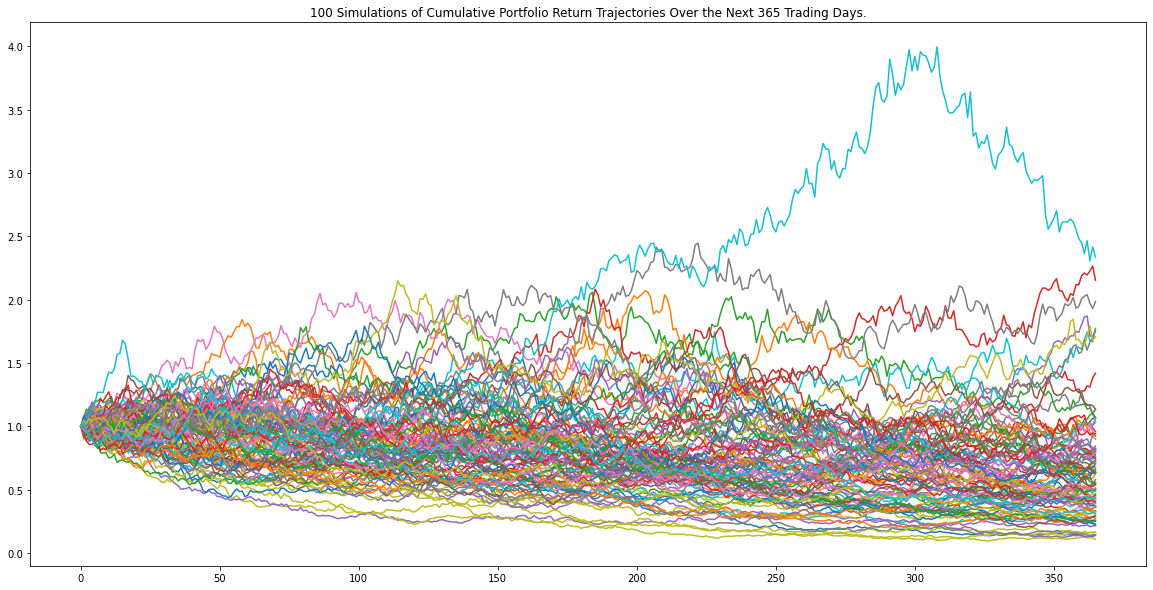

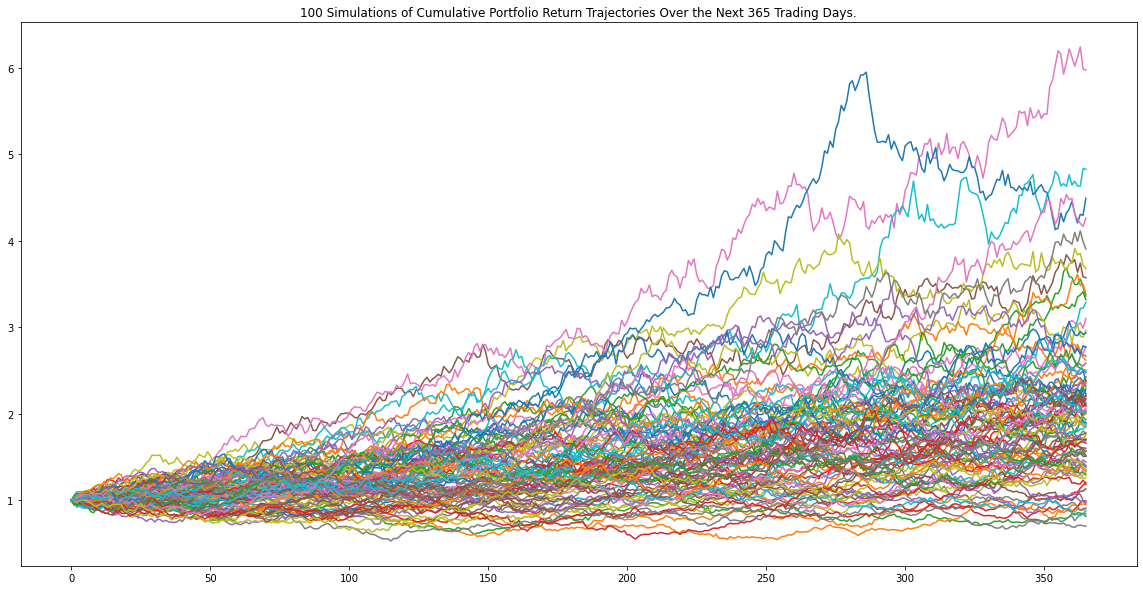

In [16]:
import warnings

MC_PoW_equal_weights = MCSimulation(
    portfolio_data = pow_coins_df,
    weights = [.5,.5],
    num_simulation = 100,
    num_trading_days = 365
)

MC_PoS_equal_weights = MCSimulation(
    portfolio_data = pos_coins_df[:334], # <== had to manually truncate... because of the nans :/
    weights = [.25,.25,.25,.25],
    num_simulation = 100,
    num_trading_days = 365
)

# Turn off output warnings
warnings.filterwarnings('ignore')

# Run the MC functions to generate the data and plots
MC_PoW_equal_weights.calc_cumulative_return()
MC_PoS_equal_weights.calc_cumulative_return()

MC_PoW_equal_weights.plot_simulation()
MC_PoS_equal_weights.plot_simulation()

## Recomendations

When deciding on the underlying technology for developing their necessary digital infrastructure, businesses, local, state, and national governments should consider the energy consumption and efficiency of blockchain. Scalability and performance in terms of energy efficiency are closely related. In the future, there should be a focus on maximizing the use of renewable energy to meet the energy demand of blockchain-based solutions. The energy efficiency (energy consumption) of blockchain solutions is closely related to the underlying mechanism used to achieve network consensus. Other types of consensus mechanisms and verification protocols should be developed to avoid excessive energy consumption as cryptocurrency becomes more popular and heavily invested in.

---
References:
###### (1) https://www.tradingview.com/symbols/CRYPTOCAP-BTC.D/ as of 5/22/22
###### (2) https://www.tradingview.com/symbols/CRYPTOCAP-ETH/ as of 5/22/22
###### (3) https://www.fool.com/investing/stock-market/market-sectors/financials/cryptocurrency-stocks/eco-friendly-cryptocurrency/ retrieved 5/22/22 written on 5/12/22

## Next Steps

**(Phase 1?)**
1. Refine the data fetchers to take GUI input from at the begining of the notebook.
2. Add data.type **stats, ticker, trade, candle** to fetcher args
3. Interagte/Migrate to [Altair Viz](https://github.com/altair-viz/altair) as preferred vizualization option.

**(Phase 2?)**
1. Make the api interface agnostic to allow any api as part of yourt configuration when running. I.e.: **coinbase, binance, coinmarketpro**, I'm aware that existing api toolkits exist. So the goal is not to re-invent the wheel.
